In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('crop_yield.csv')

In [4]:
df.head()   #First 5 rows

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [5]:
df.tail()  #Last 5 rows

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

In [6]:
df.shape

(19689, 10)

In [7]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [9]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

## Check for Missing Values

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

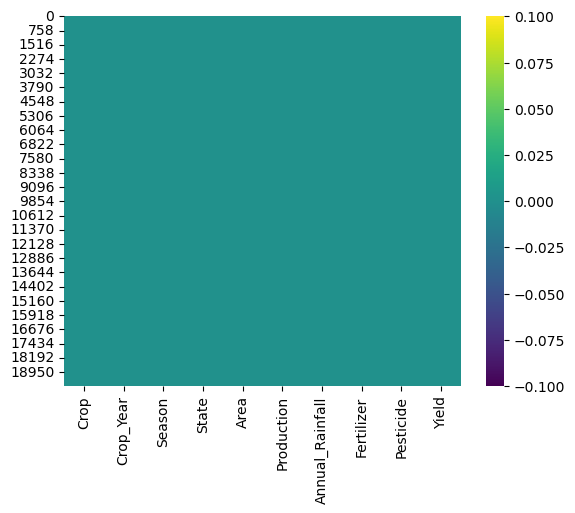

In [11]:
df.isnull().sum()  #Total nulls per column
sns.heatmap(df.isnull(), cmap='viridis')  # Visual heatmap of nulls

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [14]:
df.isnull().mean()*100     # % of missing values

Crop               0.0
Crop_Year          0.0
Season             0.0
State              0.0
Area               0.0
Production         0.0
Annual_Rainfall    0.0
Fertilizer         0.0
Pesticide          0.0
Yield              0.0
dtype: float64

## Identify Categorical Columns

In [15]:
df.select_dtypes(include='object').columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [16]:
df['Season'].unique()
df['Season'].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Whole Year '),
  Text(1, 0, 'Kharif     '),
  Text(2, 0, 'Rabi       '),
  Text(3, 0, 'Autumn     '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

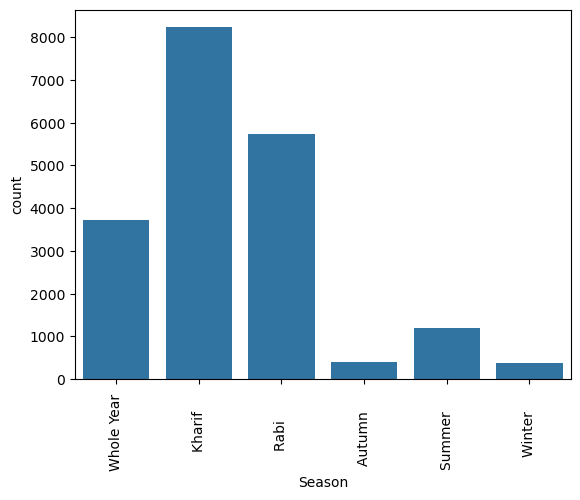

In [17]:
sns.countplot(data=df, x='Season')
plt.xticks(rotation=90)

count           19689
unique              6
top       Kharif     
freq             8232
Name: Season, dtype: object

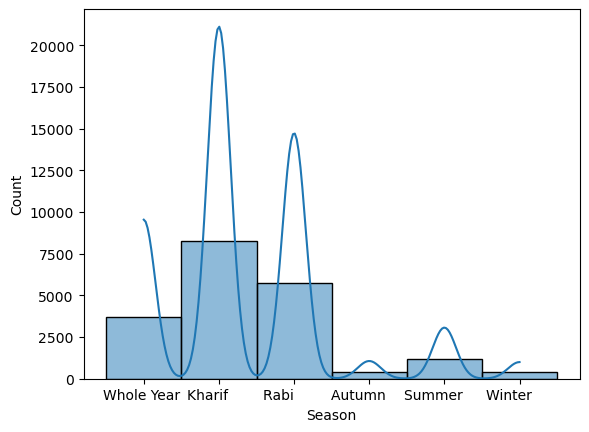

In [18]:
#Analyze Numerical Columns(like price)
sns.histplot(df['Season'], kde=True)
df['Season'].describe()

In [20]:
df['Season'].nunique()
df['Season'].unique()
df['Season'].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

In [21]:
## Data Cleaning
df.rename(columns={'old': 'new'}, inplace=True)


<Axes: >

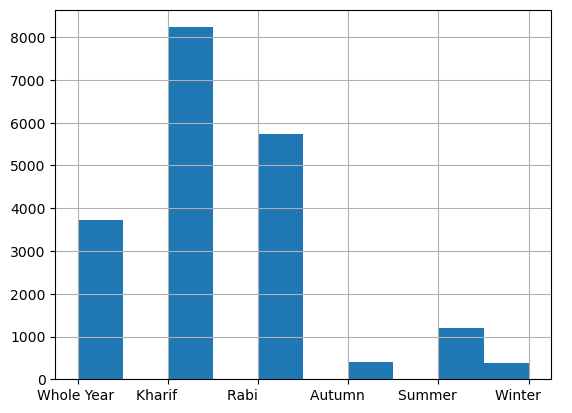

In [22]:
df['Season'].hist()

In [23]:
# Univariate Analysis    #Independent analysis of each column


# 1. Categorical Data
## a. Countplot

In [24]:
import seaborn as sns

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

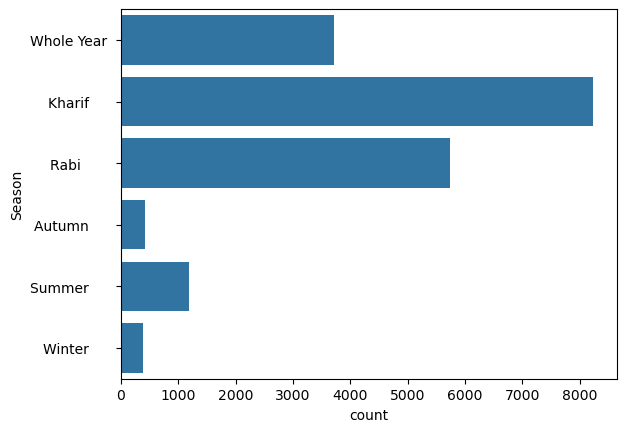

In [25]:
sns.countplot(df['Season'])
df['Season'].value_counts()

<Axes: xlabel='Season'>

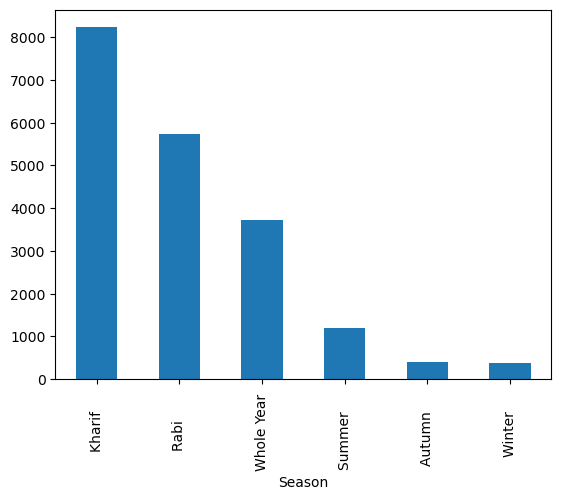

In [26]:
df['Season'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

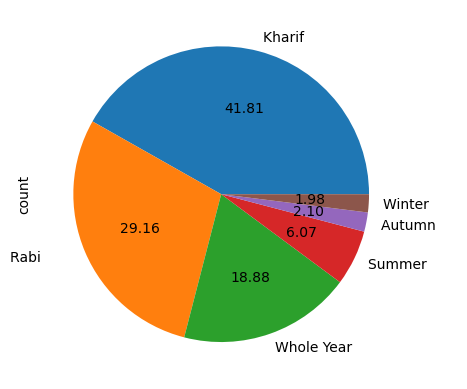

In [27]:
# b.Piechart
df['Season'].value_counts().plot(kind='pie',autopct='%.2f')

# 2.Numerical Data
## a.Histogram

(array([4624., 9283., 3086., 1288.,  799.,  306.,  147.,   49.,   34.,
          73.]),
 array([ 301.3 ,  926.44, 1551.58, 2176.72, 2801.86, 3427.  , 4052.14,
        4677.28, 5302.42, 5927.56, 6552.7 ]),
 <BarContainer object of 10 artists>)

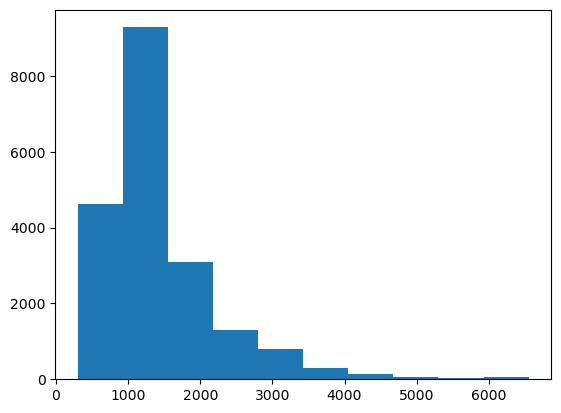

In [28]:
import matplotlib.pyplot as plt
plt.hist(df['Annual_Rainfall'])

(array([ 503.,  508.,  841., 1129., 1643., 2023., 2051., 1827., 2137.,
        1245., 1032.,  800.,  356.,  498.,  400.,  292.,  284.,  336.,
         250.,  126.,  169.,  302.,  138.,   75.,  115.,   90.,   35.,
           7.,  174.,    0.,   31.,   30.,   38.,   48.,    0.,   49.,
           0.,    0.,    0.,    0.,    0.,    0.,   34.,    0.,    0.,
           0.,    0.,   48.,    0.,   25.]),
 array([ 301.3  ,  426.328,  551.356,  676.384,  801.412,  926.44 ,
        1051.468, 1176.496, 1301.524, 1426.552, 1551.58 , 1676.608,
        1801.636, 1926.664, 2051.692, 2176.72 , 2301.748, 2426.776,
        2551.804, 2676.832, 2801.86 , 2926.888, 3051.916, 3176.944,
        3301.972, 3427.   , 3552.028, 3677.056, 3802.084, 3927.112,
        4052.14 , 4177.168, 4302.196, 4427.224, 4552.252, 4677.28 ,
        4802.308, 4927.336, 5052.364, 5177.392, 5302.42 , 5427.448,
        5552.476, 5677.504, 5802.532, 5927.56 , 6052.588, 6177.616,
        6302.644, 6427.672, 6552.7  ]),
 <BarContainer o

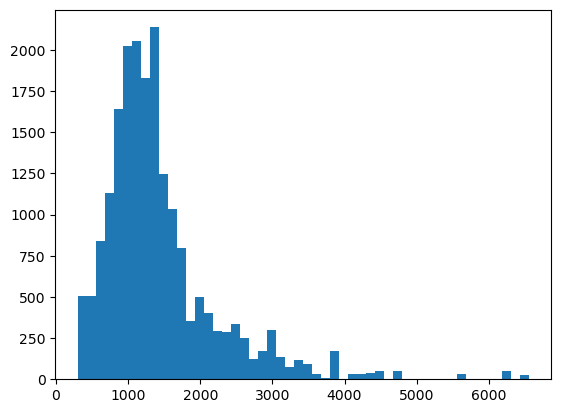

In [29]:
plt.hist(df['Annual_Rainfall'],bins=50)

## b. Displot   

C:\Users\soniy\AppData\Local\Temp\ipykernel_35172\3238382966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Rainfall'])          #KDE--> Kernel Density estimation (Curve)


<Axes: xlabel='Annual_Rainfall', ylabel='Density'>

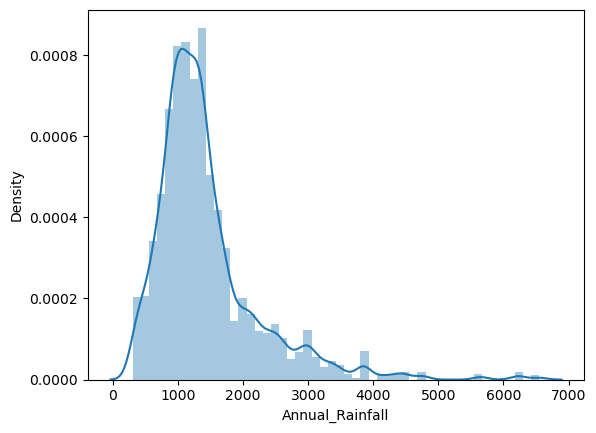

In [30]:
sns.distplot(df['Annual_Rainfall'])          #KDE--> Kernel Density estimation (Curve)
                                             #PDF--> Probability distribution function

 ## c. Boxplot

<Axes: ylabel='Yield'>

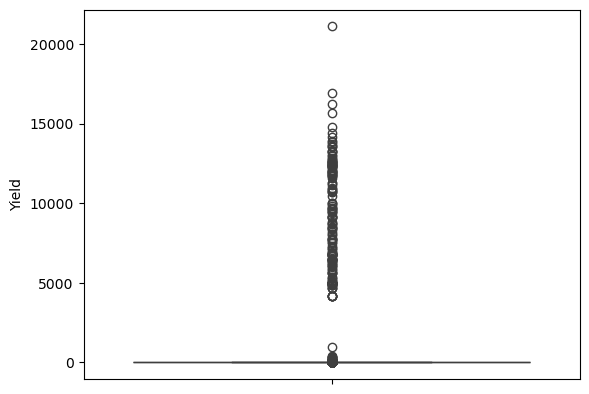

In [31]:
# Boxplot --> give five no. summary ---> used to identify potential outliers and eliminate it.
sns.boxplot(df['Yield'])

In [32]:
df['Pesticide'].min()

0.09

In [33]:
df['Pesticide'].max()

15750511.0

In [34]:
df['Pesticide'].mean()

48848.353392009245

In [35]:
df['Pesticide'].skew()      #to find skewness

25.635746086843607

In [36]:
#Bivariate Analysis
1. ##Scatterplot(Numerical -Numerical)

1.0

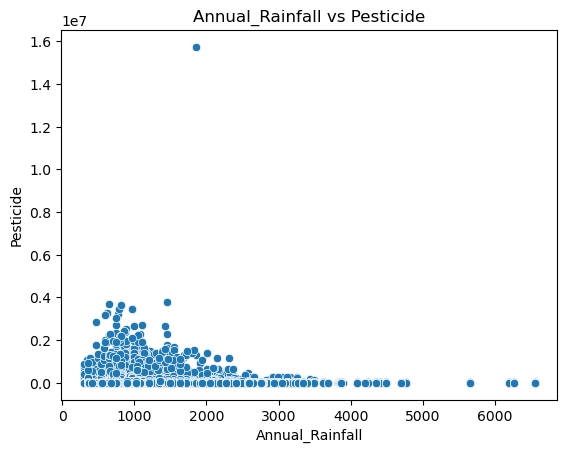

In [37]:
sns.scatterplot(x='Annual_Rainfall', y='Pesticide', data=df)
plt.title('Annual_Rainfall vs Pesticide')
plt.xlabel('Annual_Rainfall')
plt.ylabel('Pesticide')
plt.show()

<Axes: xlabel='Annual_Rainfall', ylabel='Pesticide'>

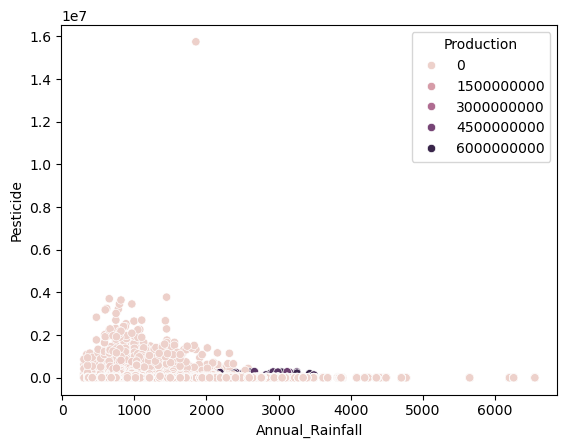

In [38]:
sns.scatterplot(x='Annual_Rainfall', y='Pesticide',data=df, hue=df['Production'])

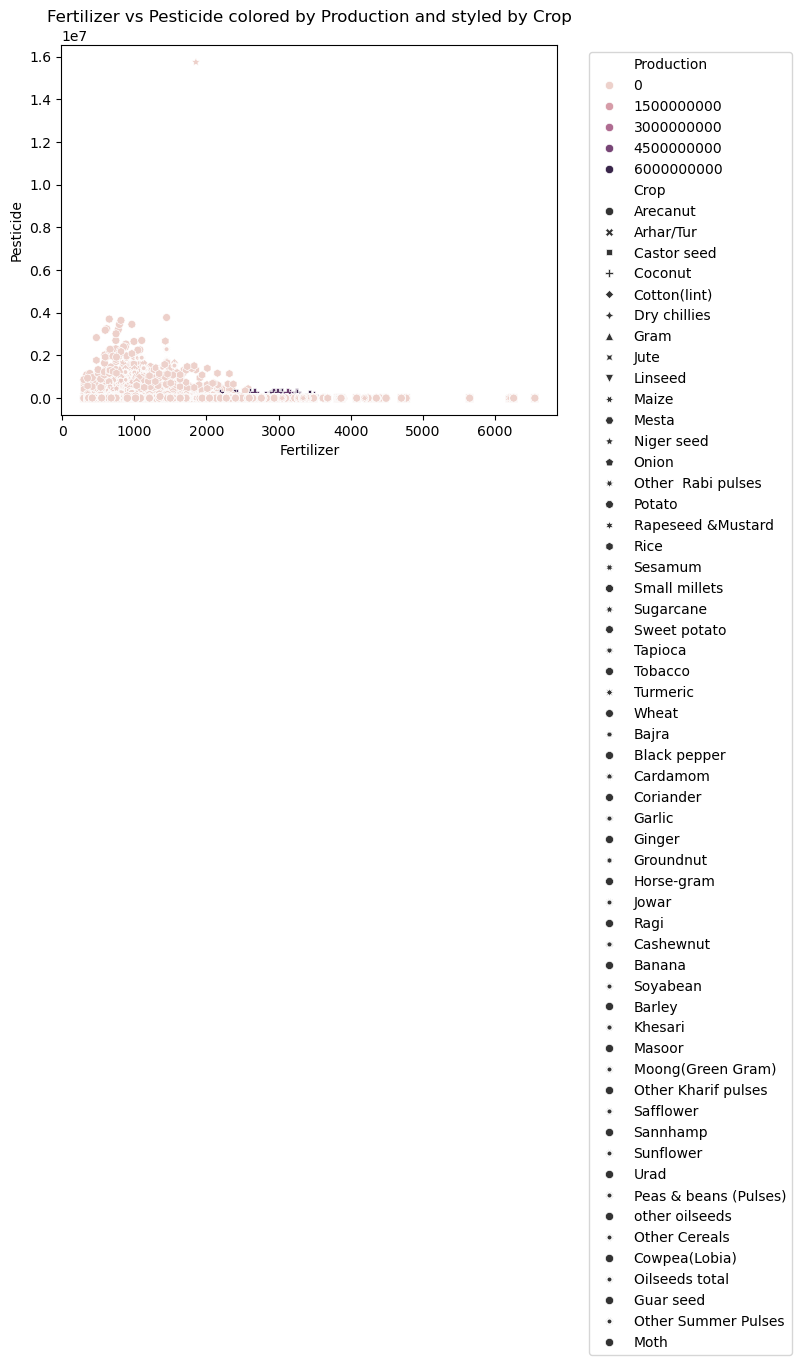

In [39]:
sns.scatterplot(x='Annual_Rainfall', y='Pesticide',data=df, hue=df['Production'],style=df['Crop'])
plt.title('Fertilizer vs Pesticide colored by Production and styled by Crop')
plt.xlabel('Fertilizer')
plt.ylabel('Pesticide')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside the plot
plt.show()

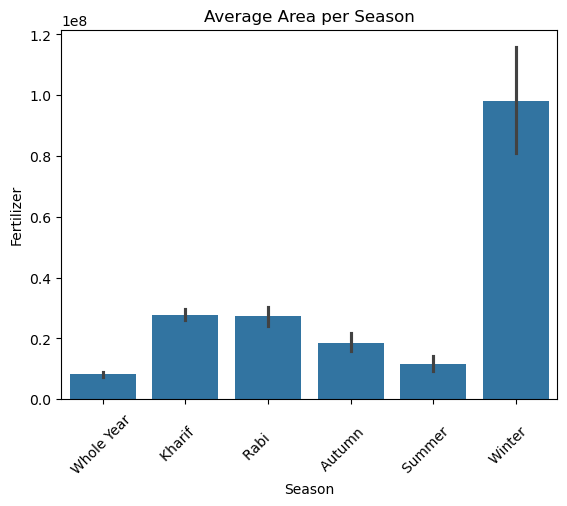

In [40]:
# 2.Bar Plot(Numerical - Categorical)
sns.barplot(x='Season', y='Fertilizer', data=df)
plt.title('Average Area per Season')
plt.xlabel('Season')
plt.ylabel('Fertilizer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

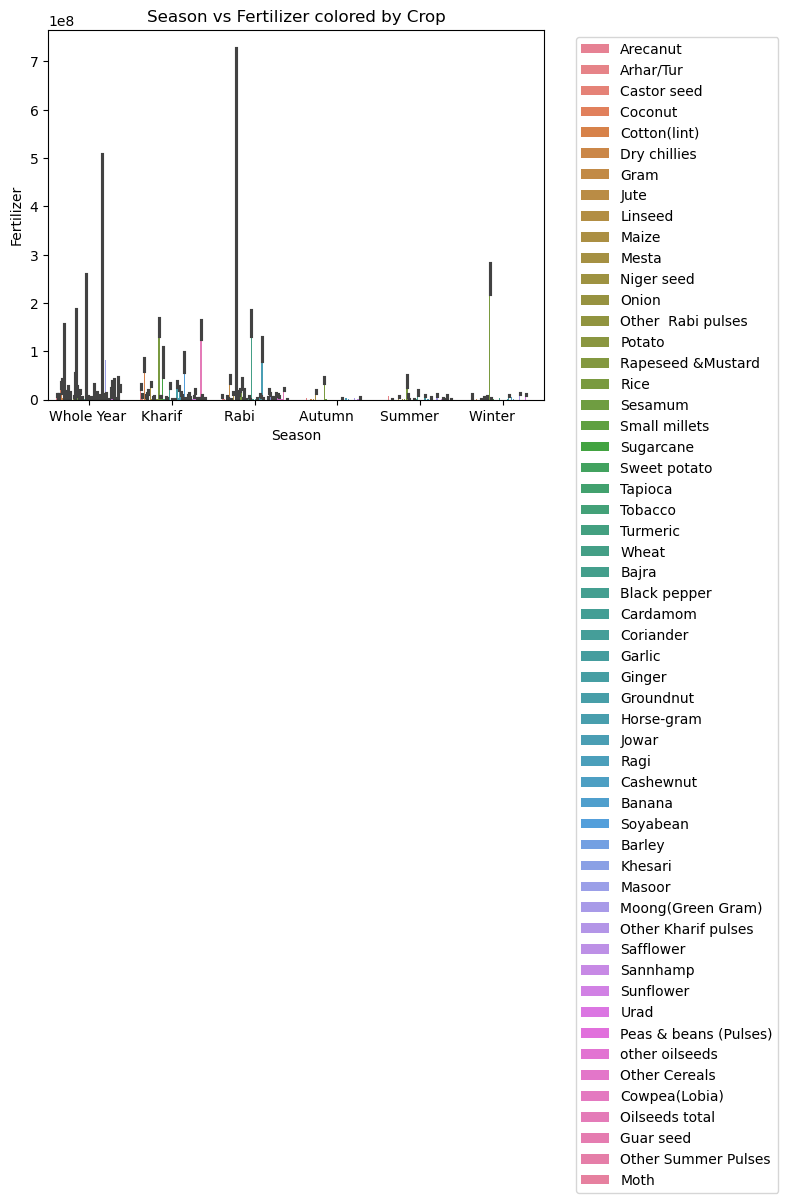

In [41]:
sns.barplot(x='Season', y='Fertilizer', data=df, hue=df['Crop'])
plt.title('Season vs Fertilizer colored by Crop')
plt.xlabel('Season')
plt.ylabel('Fertilizer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside the plot
plt.show()

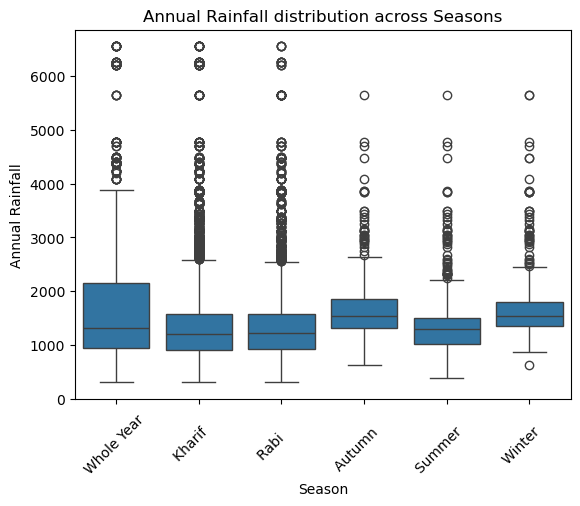

In [42]:
# 3. Box Plot (Numerical - Categorical)
sns.boxplot(x='Season', y='Annual_Rainfall', data=df)
plt.title('Annual Rainfall distribution across Seasons')
plt.xlabel('Season')
plt.ylabel('Annual Rainfall')
plt.xticks(rotation=45)
plt.show()

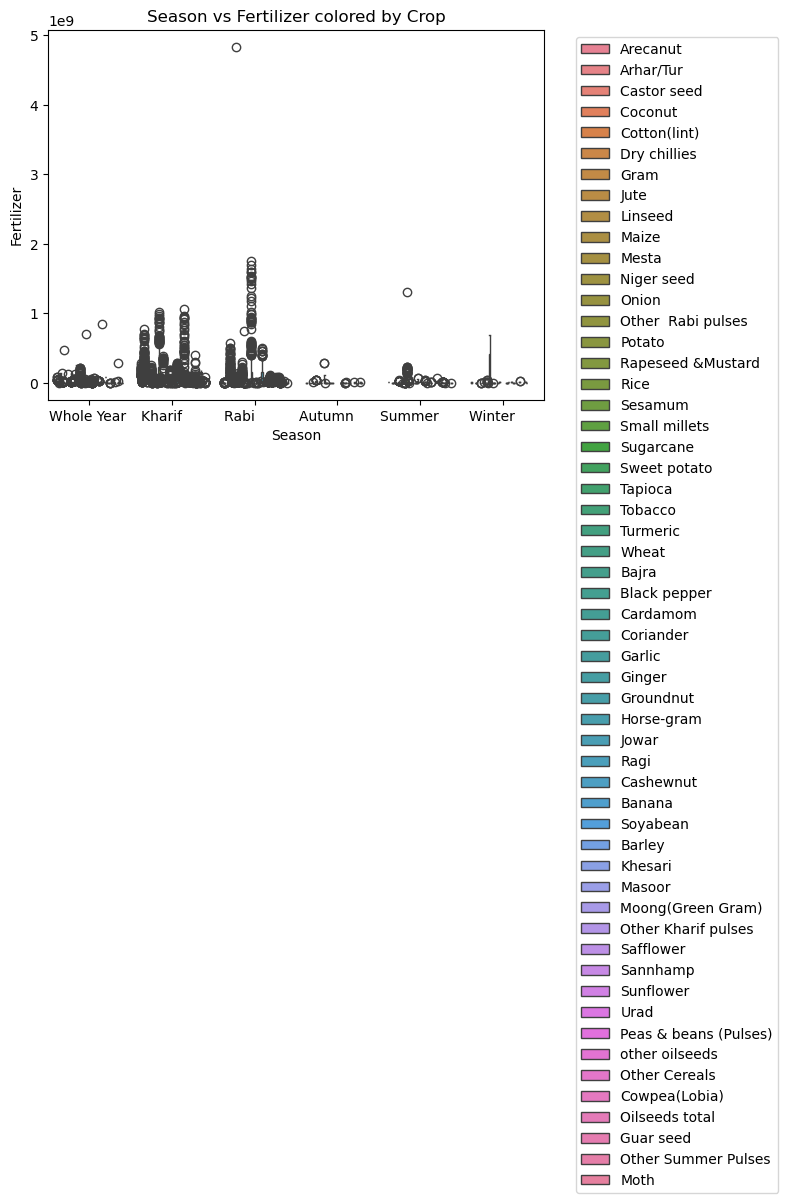

In [43]:
sns.boxplot(x='Season', y='Fertilizer', hue=df['Crop'], data=df)
plt.title('Season vs Fertilizer colored by Crop')
plt.xlabel('Season')
plt.ylabel('Fertilizer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside the plot
plt.show()


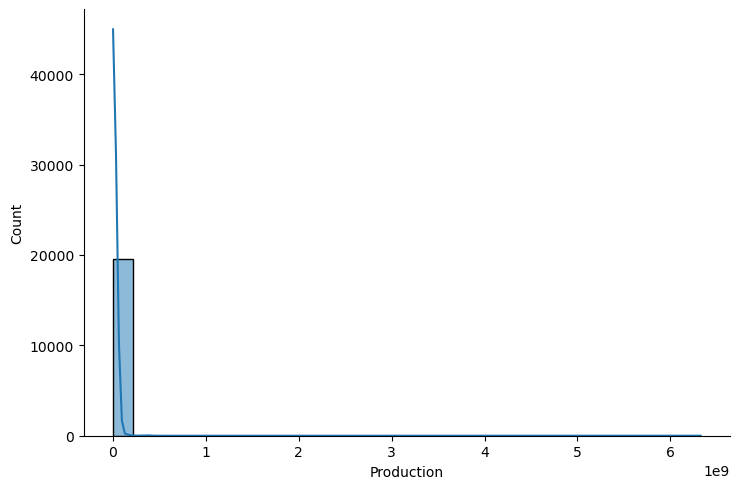

In [44]:
## 4. Distplot(Numerical-Categorical)

sns.displot(data=df, x='Production', kind='hist', kde=True, bins=30,height=5,aspect=1.5           
)

In [45]:
# 5.HeatMap(Categorical - Categorical)
df.head(3)

Crop  Crop_Year       Season  State     Area  Production  \
0     Arecanut       1997  Whole Year   Assam  73814.0       56708   
1    Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2  Castor seed       1997  Kharif       Assam    796.0          22   

   Annual_Rainfall  Fertilizer  Pesticide     Yield  
0           2051.4  7024878.38   22882.34  0.796087  
1           2051.4   631643.29    2057.47  0.710435  
2           2051.4    75755.32     246.76  0.238333

In [46]:
pd.crosstab(df['Season'],df['Production'])

Production   0           1           2           3           4           \
Season                                                                    
Autumn                0           0           0           1           0   
Kharif               51          44          41          34          29   
Rabi                 10          21          10          24          21   
Summer                2           3          11           5           3   
Whole Year           49          11           6           3           2   
Winter                0           0           0           0           0   

Production   5           6           7           8           9           ...  \
Season                                                                   ...   
Autumn                0           0           0           1           1  ...   
Kharif               16          18          23          15          20  ...   
Rabi                 13           7           4          11          14  ...   
Summer                7           7           3           5           4  ...   
Whole Year            2           5           6           4           3  ...   
Winter                0           0           0           0           0  ...   

Production   5873000000  5876000000  5921000000  5940564000  5947000000  \
Season                                                                    
Autumn                0           0           0           0           0   
Kharif                0           0           0           0           0   
Rabi                  0           0           0           0           0   
Summer                0           0           0           0           0   
Whole Year            1           1           1           1           1   
Winter                0           0           0           0           0   

Production   5962500000  6001000000  6054000000  6200900000  6326000000  
Season                                                                   
Autumn                0           0           0           0           0  
Kharif                0           0           0           0           0  
Rabi                  0           0           0           0           0  
Summer                0           0           0           0           0  
Whole Year            1           1           1           1           1  
Winter                0           0           0           0           0  

[6 rows x 14016 columns]

<Axes: xlabel='Production', ylabel='Season'>

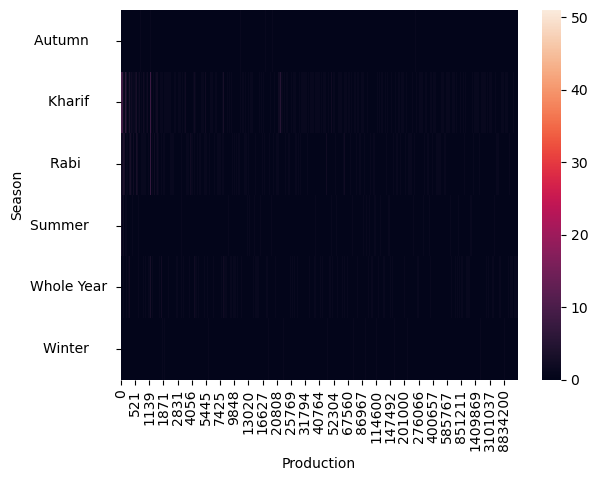

In [47]:
sns.heatmap(pd.crosstab(df['Season'],df['Production']))

In [48]:
# 6. ClusterMap (Categorical - Categorical)
pd.crosstab(df['Yield'],df['Production'])

Production    0           1           2           3           4           \
Yield                                                                      
0.000000             108           1           0           0           0   
0.003571               0           0           0           0           0   
0.016667               0           0           0           0           0   
0.017647               0           0           0           0           0   
0.028571               0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
14794.630000           0           0           0           0           0   
15636.632310           0           0           0           0           0   
16254.000000           0           0           0           0           0   
16935.058460           0           0           0           0           0   
21105.000000           0           0           0           0           0   

Production    5           6           7           8           9           ...  \
Yield                                                                     ...   
0.000000               0           0           1           0           0  ...   
0.003571               0           0           0           0           0  ...   
0.016667               0           0           0           0           0  ...   
0.017647               0           0           0           0           0  ...   
0.028571               0           0           0           0           0  ...   
...                  ...         ...         ...         ...         ...  ...   
14794.630000           0           0           0           0           0  ...   
15636.632310           0           0           0           0           0  ...   
16254.000000           0           0           0           0           0  ...   
16935.058460           0           0           0           0           0  ...   
21105.000000           0           0           0           0           0  ...   

Production    5873000000  5876000000  5921000000  5940564000  5947000000  \
Yield                                                                      
0.000000               0           0           0           0           0   
0.003571               0           0           0           0           0   
0.016667               0           0           0           0           0   
0.017647               0           0           0           0           0   
0.028571               0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
14794.630000           0           0           0           0           0   
15636.632310           0           0           0           0           0   
16254.000000           0           0           0           0           0   
16935.058460           0           0           0           0           0   
21105.000000           0           0           0           0           0   

Production    5962500000  6001000000  6054000000  6200900000  6326000000  
Yield                                                                     
0.000000               0           0           0           0           0  
0.003571               0           0           0           0           0  
0.016667               0           0           0           0           0  
0.017647               0           0           0           0           0  
0.028571               0           0           0           0           0  
...                  ...         ...         ...         ...         ...  
14794.630000           0           0           0           0           0  
15636.632310           0           0           0           0           0  
16254.000000           0           0           0           0           0  
16935.058460           0           0           0           0           0  
21105.000000           0           0           0           0        

In [49]:
df['Yield_rounded'] = df['Yield'].round(-1)       # round to nearest 10
df['Production_rounded'] = df['Production'].round(-5)  # round to nearest 100000

In [50]:
cross_tab = pd.crosstab(df['Yield_rounded'], df['Production_rounded'])


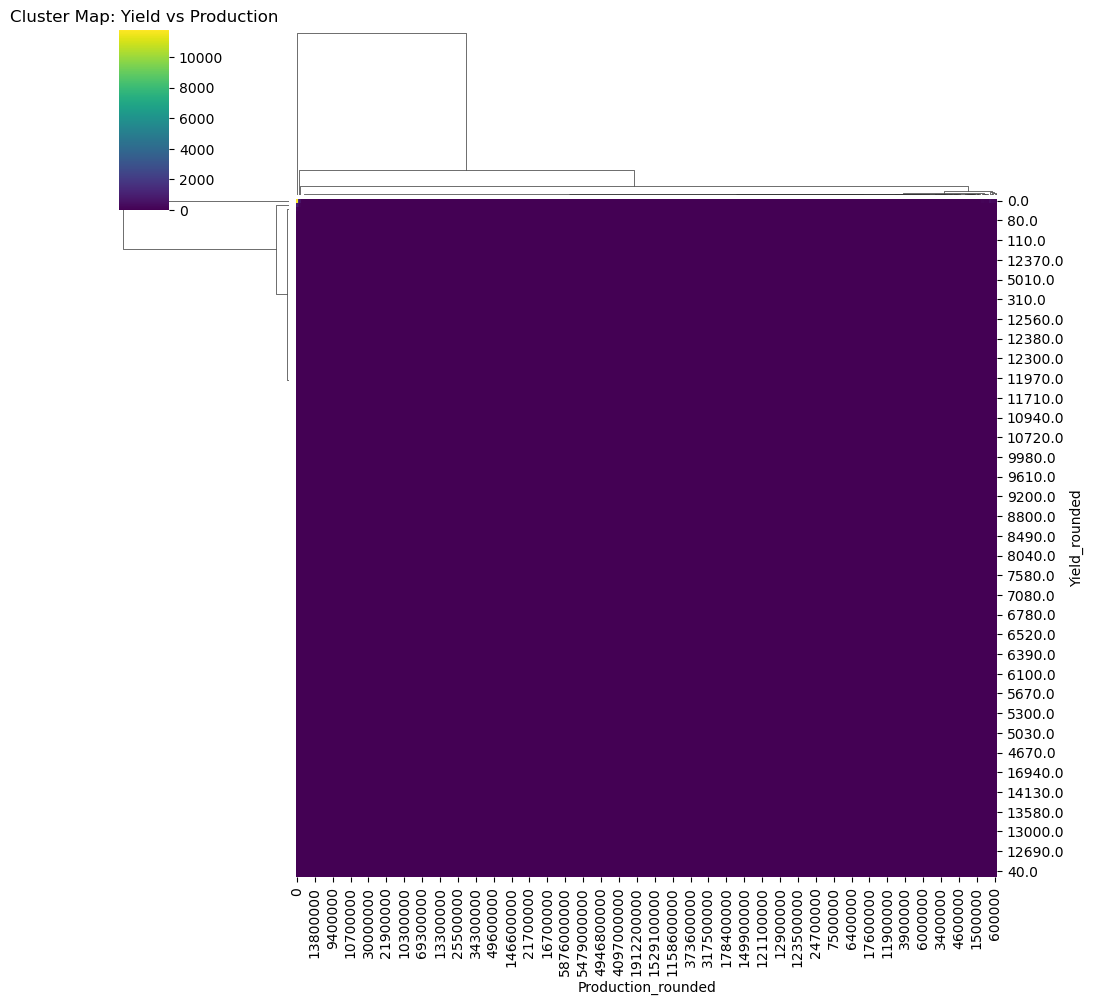

In [51]:
# Show clustermap
sns.clustermap(cross_tab, cmap='viridis')
plt.title("Cluster Map: Yield vs Production")
plt.show()

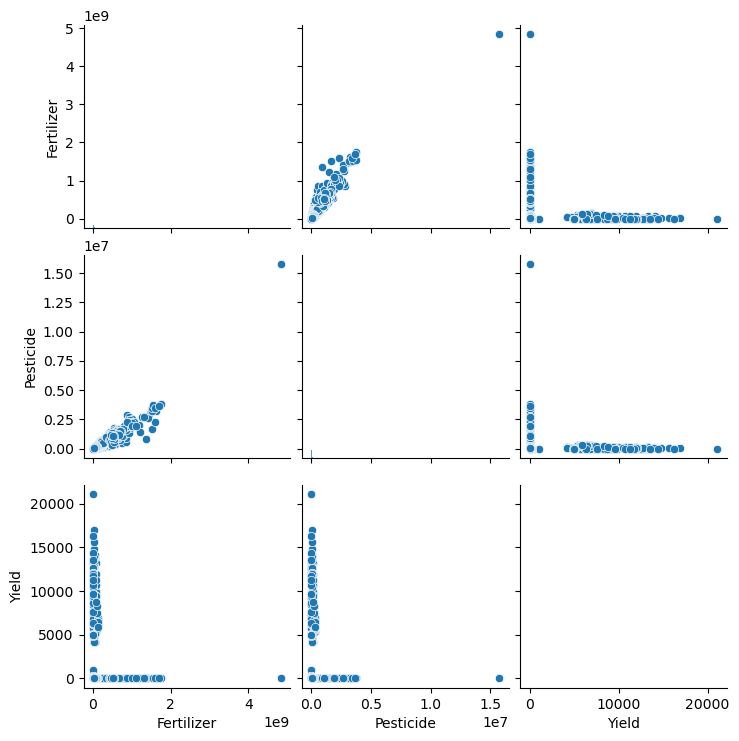

In [52]:
# 7. Pairplot             #Detect numerical columns and make a scatter plot with each other
sns.pairplot(df[['Fertilizer','Pesticide','Yield']])


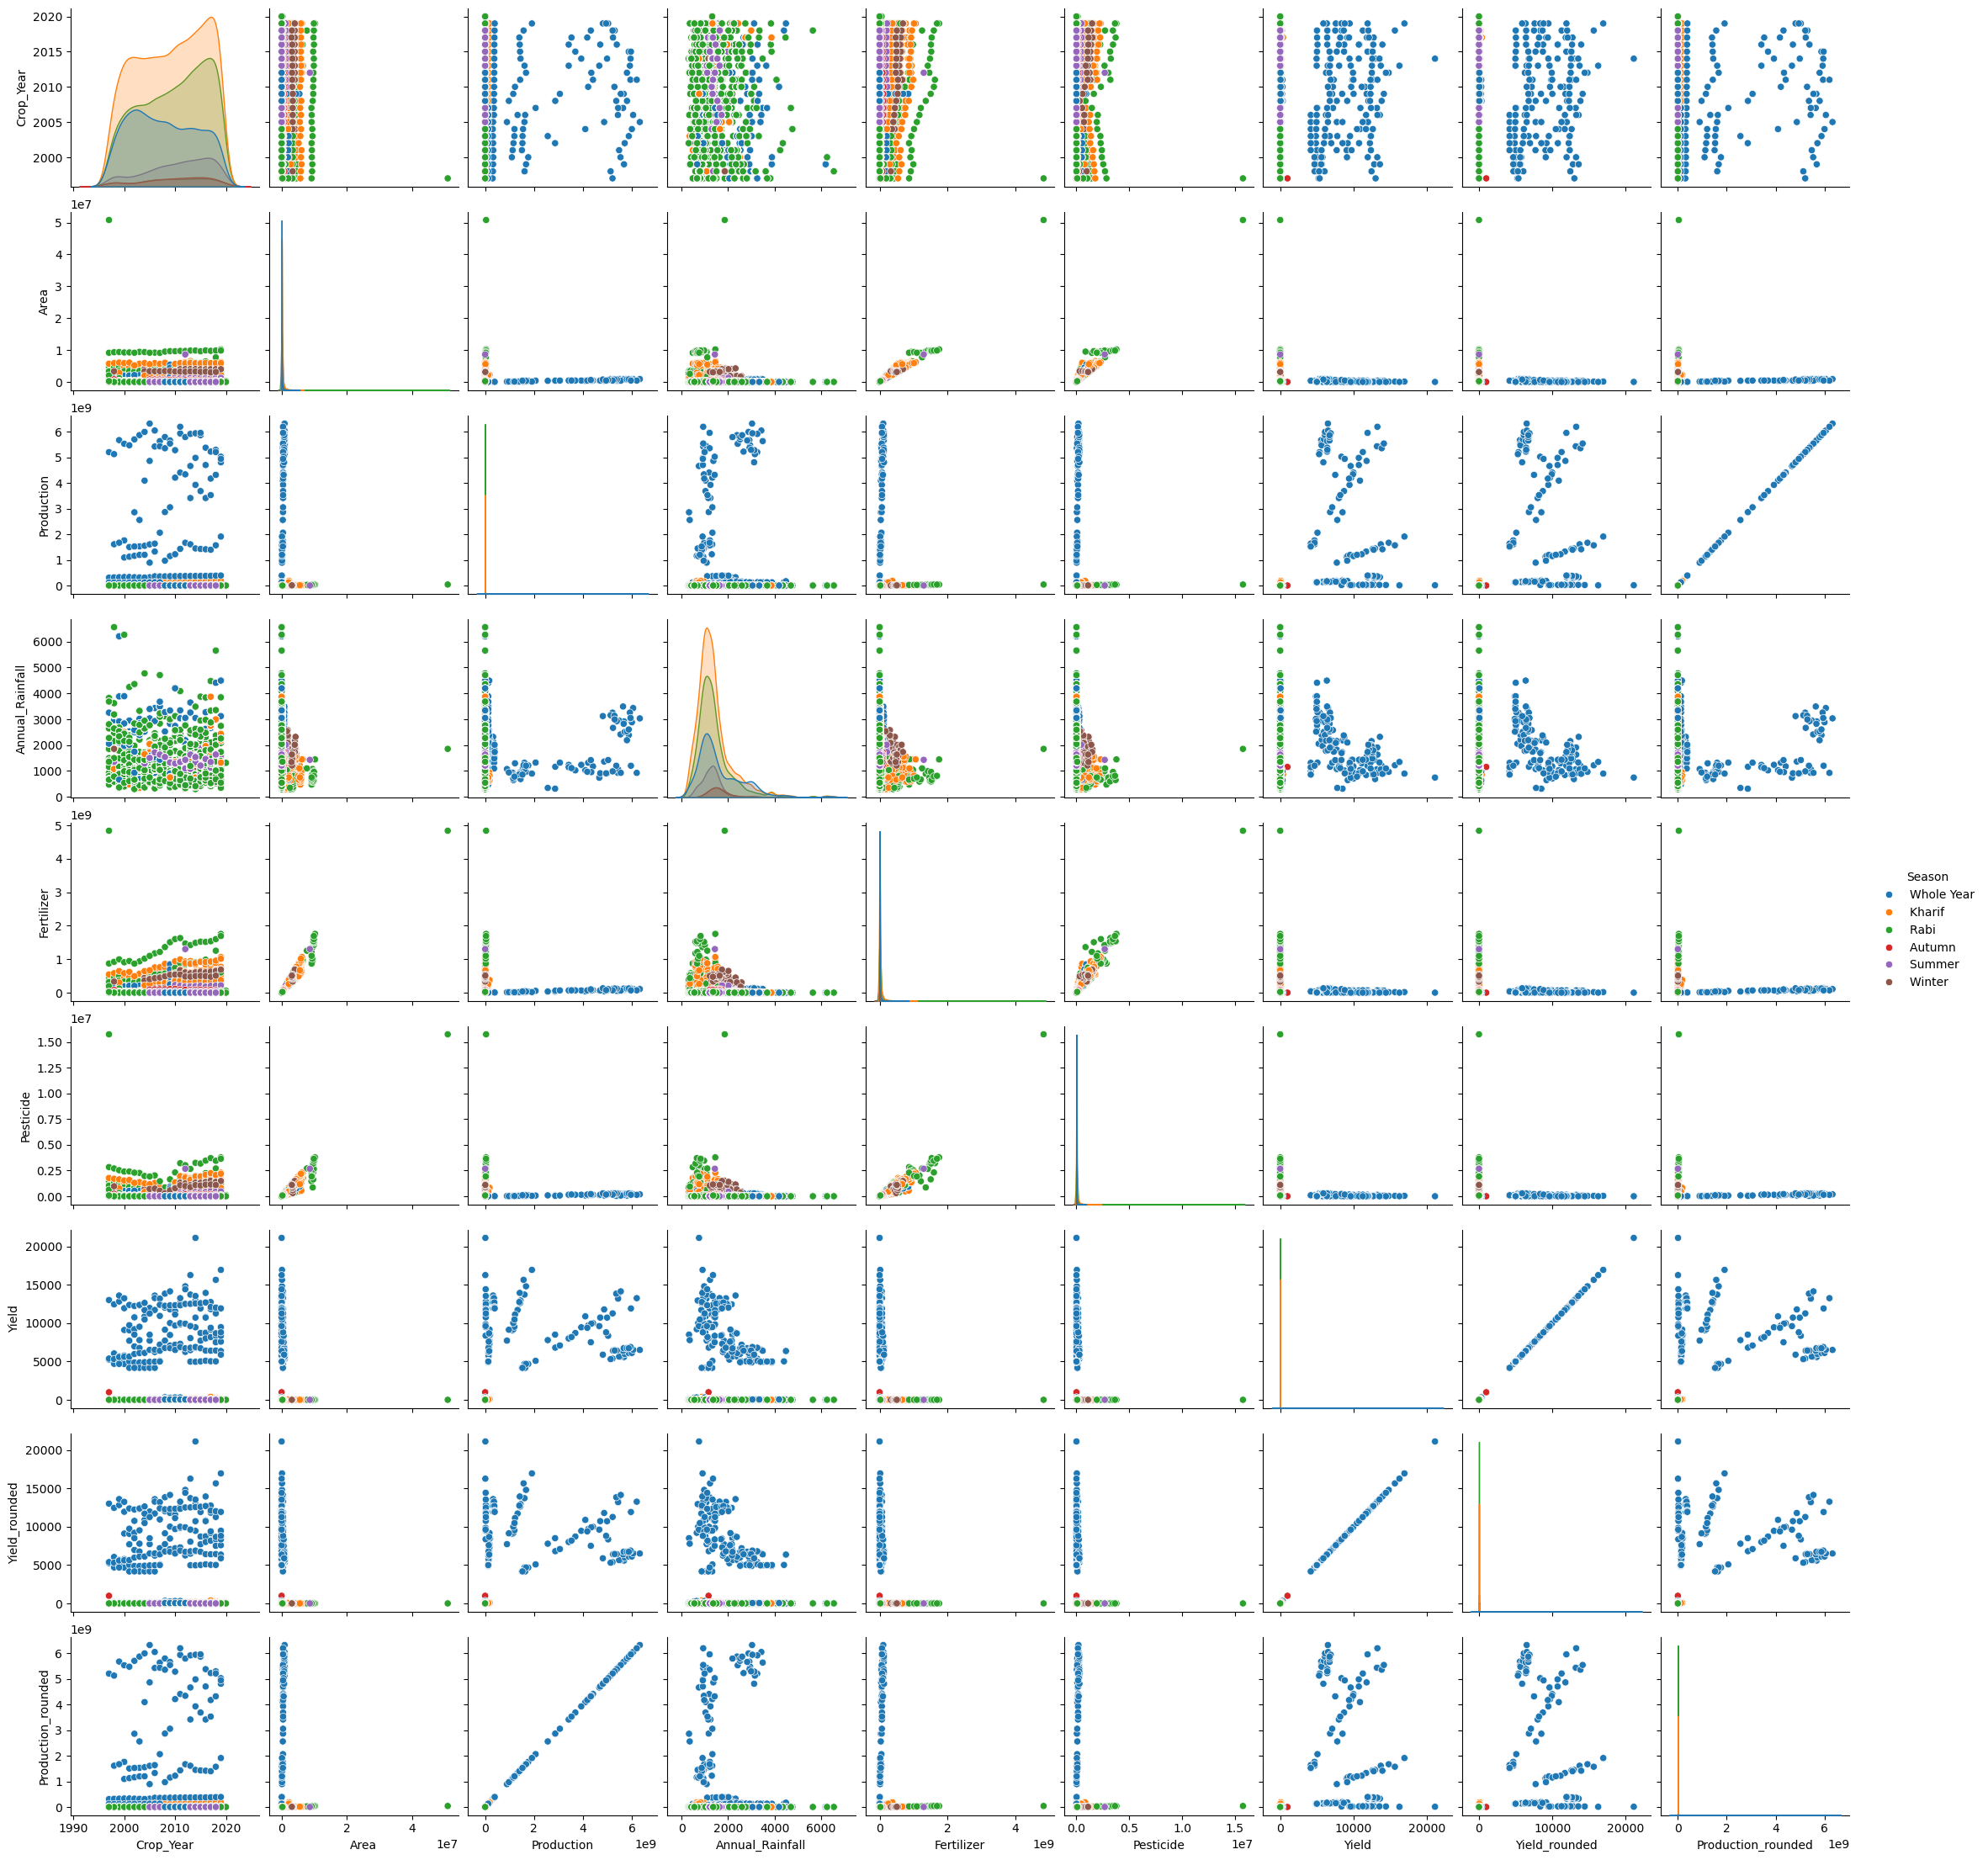

In [53]:
sns.pairplot(df,hue='Season')

In [54]:
# 8.Line Plot(Numerical-Numerical)           #Join the all points of scatter plot
df.head()                                          #Use==>X-axis quantity = time based

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  Yield_rounded  \
0           2051.4  7024878.38   22882.34     0.796087            0.0   
1           2051.4   631643.29    2057.47     0.710435            0.0   
2           2051.4    75755.32     246.76     0.238333            0.0   
3           2051.4  1870661.52    6093.36  5238.051739         5240.0   
4           2051.4   165500.63     539.09     0.420909            0.0   

   Production_rounded  
0              100000  
1                   0  
2                   0  
3           126900000  
4                   0

In [55]:
new = df.groupby('Crop_Year').sum().reset_index()

<Axes: ylabel='Production'>

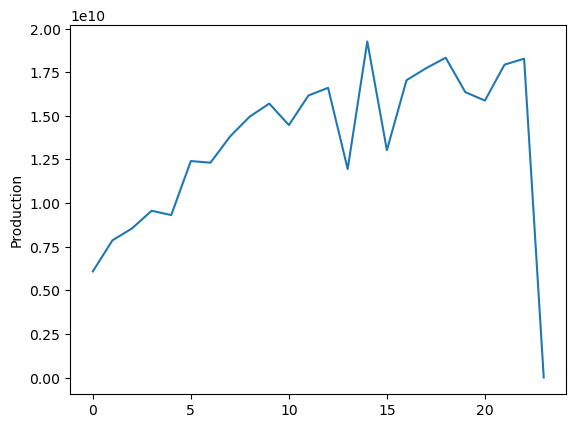

In [56]:
sns.lineplot(new['Production'])

In [57]:
df.pivot_table(values='Production', index='Area', columns='Crop_Year')


Crop_Year         1997  1998  1999  2000  2001      2002  2003  2004  \
Area                                                                   
0.5                NaN   NaN   NaN   NaN   NaN       NaN   NaN   0.0   
0.8                NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
1.0               12.0   1.0   1.0   1.0   1.0  0.666667   NaN   NaN   
1.4                NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
2.0                3.0   1.0   NaN   3.0   1.0       NaN   1.0   NaN   
...                ...   ...   ...   ...   ...       ...   ...   ...   
9852504.0          NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
9855900.0          NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
9884913.0          NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
10216517.0         NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
50808100.0  38657300.0   NaN   NaN   NaN   NaN       NaN   NaN   NaN   

Crop_Year       2005  2006  ...   2011      2012      2013       2014  2015  \
Area                        ...                                               
0.5              NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   
0.8              NaN   NaN  ...    NaN       NaN       NaN   2.000000   NaN   
1.0         0.333333   3.0  ...  4.875  4.909091  5.444444   2.666667   3.0   
1.4              NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   
2.0              NaN   6.0  ...  3.500  8.833333  8.600000  11.428571   2.4   
...              ...   ...  ...    ...       ...       ...        ...   ...   
9852504.0        NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   
9855900.0        NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   
9884913.0        NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   
10216517.0       NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   
50808100.0       NaN   NaN  ...    NaN       NaN       NaN        NaN   NaN   

Crop_Year          2016      2017        2018          2019  2020  
Area                                                               
0.5                 NaN       NaN         NaN           NaN   NaN  
0.8                 NaN       NaN         NaN           NaN   NaN  
1.0                1.75  3.714286         3.7  2.300000e+00   NaN  
1.4                 NaN       NaN         2.0           NaN   NaN  
2.0                3.00  5.000000         9.0  8.666667e+00   NaN  
...                 ...       ...         ...           ...   ...  
9852504.0           NaN       NaN         NaN  3.620966e+07   NaN  
9855900.0           NaN       NaN  38039724.0           NaN   NaN  
9884913.0   34971381.00       NaN         NaN           NaN   NaN  
10216517.0          NaN       NaN         NaN  3.750722e+07   NaN  
50808100.0          NaN       NaN         NaN           NaN   NaN  

[13644 rows x 24 columns]

In [58]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [59]:
import seaborn as sns

<Axes: xlabel='Crop_Year', ylabel='Area'>

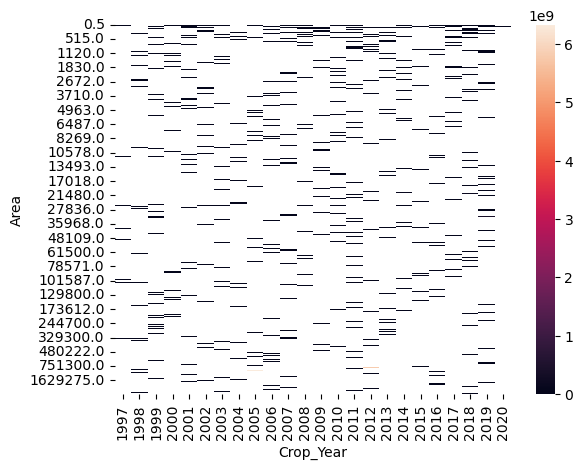

In [60]:
sns.heatmap(df.pivot_table(values='Production', index='Area', columns='Crop_Year'))

## Detect and Remove Outliers

In [61]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  Yield_rounded  \
count  1.968900e+04  1.968900e+04  19689.000000   19689.000000   
mean   2.410331e+07  4.884835e+04     79.954009      79.096958   
std    9.494600e+07  2.132874e+05    878.306193     878.365541   
min    5.417000e+01  9.000000e-02      0.000000       0.000000   
25%    1.880146e+05  3.567000e+02      0.600000       0.000000   
50%    1.234957e+06  2.421900e+03      1.030000       0.000000   
75%    1.000385e+07  2.004170e+04      2.388889       0.000000   
max    4.835407e+09  1.575051e+07  21105.000000   21100.000000   

       Production_rounded  
count        1.968900e+04  
mean         1.643171e+07  
std          2.630573e+08  
min          0.000000e+00  
25%          0.000000e+00  
50%          0.000000e+00  
75%          1.000000e+05  
max          6.326000e+09

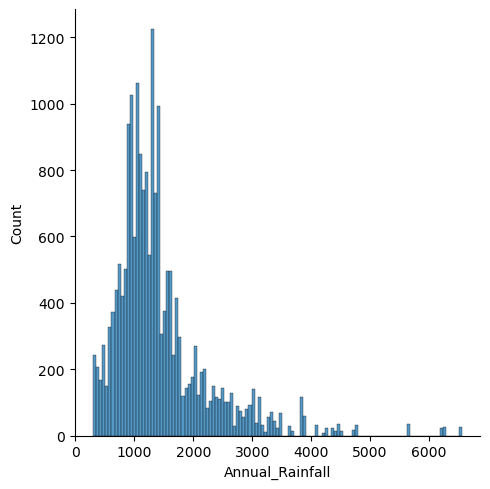

In [62]:
sns.displot(df['Annual_Rainfall'])

<Axes: ylabel='Annual_Rainfall'>

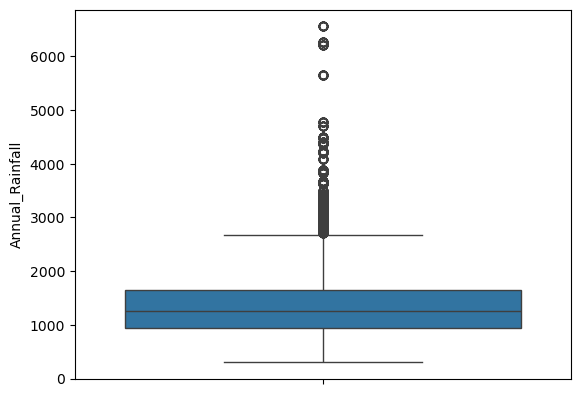

In [63]:
# to see outliers clearly
sns.boxplot(df['Annual_Rainfall'])

## Z-score method

In [64]:
# find the limits
upper_limit = df['Annual_Rainfall'].mean() + 3*df['Annual_Rainfall'].std()
lower_limit = df['Annual_Rainfall'].mean() - 3*df['Annual_Rainfall'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 3888.4839428899577
lower limit: -1012.9735896580212


In [65]:
# find the outliers
df.loc[(df['Annual_Rainfall'] > upper_limit) |  (df['Annual_Rainfall'] < lower_limit)]

Crop  Crop_Year       Season      State     Area  \
263               Arecanut       1998  Whole Year   Meghalaya   9585.0   
264              Arhar/Tur       1998  Kharif       Meghalaya    861.0   
265                 Banana       1998  Whole Year   Meghalaya   5194.0   
266           Cotton(lint)       1998  Kharif       Meghalaya   7549.0   
267           Dry chillies       1998  Whole Year   Meghalaya   1764.0   
...                    ...        ...          ...        ...      ...   
19432  Other Kharif pulses       2010  Kharif             Goa    180.0   
19433                 Ragi       2010  Kharif             Goa    150.0   
19434                 Rice       2010  Kharif             Goa  30632.0   
19435                 Rice       2010  Rabi               Goa  15980.0   
19436            Sugarcane       2010  Whole Year         Goa    921.0   

       Production  Annual_Rainfall  Fertilizer  Pesticide      Yield  \
263         11567           6552.7   946998.00    2779.65   1.151667   
264           678           6552.7    85066.80     249.69   0.803333   
265         62888           6552.7   513167.20    1506.26  11.267143   
266          5599           6552.7   745841.20    2189.21   0.796667   
267          1051           6552.7   174283.20     511.56   0.598571   
...           ...              ...         ...        ...        ...   
19432         146           4193.3    29899.80      43.20   0.755000   
19433         133           4193.3    24916.50      36.00   0.900000   
19434       72221           4193.3  5088281.52    7351.68   2.350000   
19435       42773           4193.3  2654437.80    3835.20   2.680000   
19436       49109           4193.3   152987.31     221.04  48.715000   

       Yield_rounded  Production_rounded  
263              0.0                   0  
264              0.0                   0  
265             10.0              100000  
266              0.0                   0  
267              0.0                   0  
...              ...                 ...  
19432            0.0                   0  
19433            0.0                   0  
19434            0.0              100000  
19435            0.0                   0  
19436           50.0                   0  

[303 rows x 12 columns]

In [66]:
# trimming ---> delete the outlier data
new_df = df.loc[(df['Annual_Rainfall'] < upper_limit) &  (df['Annual_Rainfall'] > lower_limit)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 19689
after removing outliers: 19386
outliers: 303


<Axes: ylabel='Annual_Rainfall'>

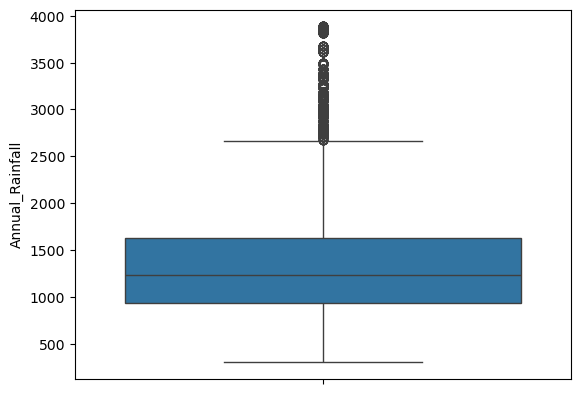

In [67]:
sns.boxplot(new_df['Annual_Rainfall'])

In [68]:
# capping - change the outlier values to uppeer (or) lower limit values
new_df = df.copy()
new_df.loc[new_df['Annual_Rainfall']>upper_limit, 'Annual_Rainfall'] = upper_limit
new_df.loc[new_df['Annual_Rainfall']<lower_limit, 'Annual_Rainfall'] = lower_limit

<Axes: ylabel='Annual_Rainfall'>

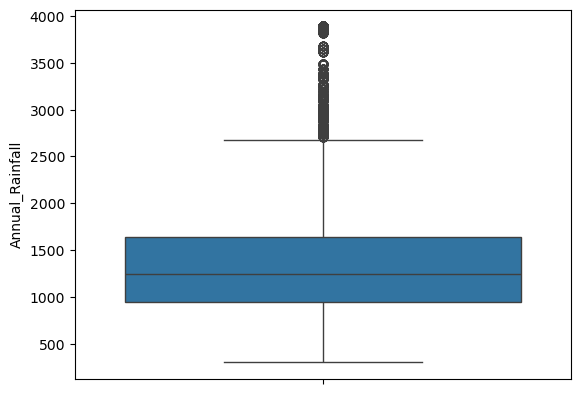

In [69]:
sns.boxplot(new_df['Annual_Rainfall'])

In [70]:
len(new_df)

19689

 ##  Inter-Quartile Range Method

In [71]:
q1 = df['Annual_Rainfall'].quantile(0.25)
q3 = df['Annual_Rainfall'].quantile(0.75)
iqr = q3-q1

In [72]:
q1,q3,iqr

(940.7, 1643.7, 703.0)

In [73]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit,upper_limit

(-113.79999999999995, 2698.2)

<Axes: ylabel='Annual_Rainfall'>

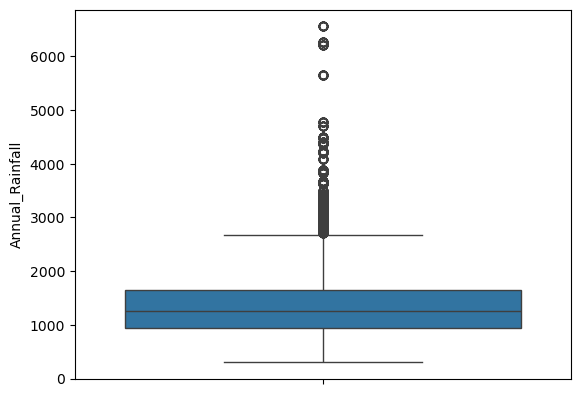

In [74]:
sns.boxplot(df['Annual_Rainfall'])

In [75]:
# find the outliers
df.loc[(df['Annual_Rainfall'] >= upper_limit) |  (df['Annual_Rainfall'] <= lower_limit)]

Crop  Crop_Year       Season   State      Area  \
57                Arecanut       1997  Whole Year   Kerala   76145.0   
58            Black pepper       1997  Whole Year   Kerala  173855.0   
59               Cashewnut       1997  Whole Year   Kerala   96073.0   
60                Coconut        1997  Whole Year   Kerala  884344.0   
61                 Tapioca       1997  Whole Year   Kerala  132875.0   
...                    ...        ...          ...     ...       ...   
19505  Other Kharif pulses       2012  Kharif          Goa     226.0   
19506                 Ragi       2012  Kharif          Goa      48.0   
19507                 Rice       2012  Kharif          Goa   31255.0   
19508                 Rice       2012  Rabi            Goa   14575.0   
19509            Sugarcane       2012  Whole Year      Goa     854.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  \
57          93995           3252.4   7246719.65   23604.95     1.147857   
58          55520           3252.4  16545780.35   53895.05     0.240714   
59          74142           3252.4   9143267.41   29782.63     0.589286   
60     5210000000           3252.4  84163018.48  274146.64  5376.054286   
61        2841819           3252.4  12645713.75   41191.25    22.803571   
...           ...              ...          ...        ...          ...   
19505         190           3048.9     34080.80      70.06     0.670000   
19506          50           3048.9      7238.40      14.88     1.100000   
19507       81229           3048.9   4713254.00    9689.05     2.590000   
19508       41592           3048.9   2197910.00    4518.25     2.850000   
19509       46055           3048.9    128783.20     264.74    47.765000   

       Yield_rounded  Production_rounded  
57               0.0              100000  
58               0.0              100000  
59               0.0              100000  
60            5380.0          5210000000  
61              20.0             2800000  
...              ...                 ...  
19505            0.0                   0  
19506            0.0                   0  
19507            0.0              100000  
19508            0.0                   0  
19509           50.0                   0  

[1527 rows x 12 columns]

In [76]:
# trimming ---> delete the outlier data
new_df = df.loc[(df['Annual_Rainfall'] <= upper_limit) &  (df['Annual_Rainfall'] >= lower_limit)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 19689
after removing outliers: 18162
outliers: 1527


<Axes: ylabel='Annual_Rainfall'>

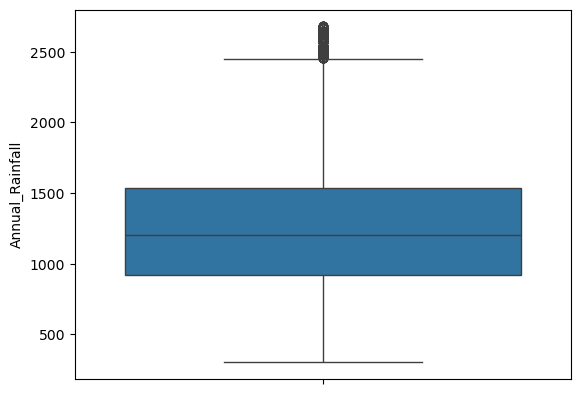

In [77]:
sns.boxplot(new_df['Annual_Rainfall'])

In [78]:
# capping - change the outlier values to uppeer (or) lower limit values
new_df = df.copy()
new_df.loc[new_df['Annual_Rainfall']>=upper_limit, 'Annual_Rainfall'] = upper_limit
new_df.loc[new_df['Annual_Rainfall']<=lower_limit, 'Annual_Rainfall'] = lower_limit

<Axes: ylabel='Annual_Rainfall'>

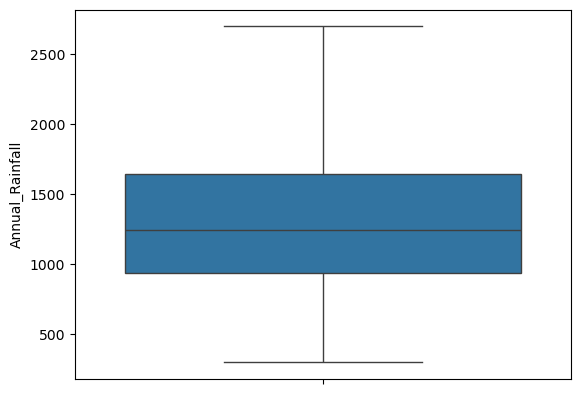

In [79]:
sns.boxplot(new_df['Annual_Rainfall'])

## Feature Selection Techniques
## Correlation Matrix

In [90]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  Yield_rounded  \
0           2051.4  7024878.38   22882.34     0.796087            0.0   
1           2051.4   631643.29    2057.47     0.710435            0.0   
2           2051.4    75755.32     246.76     0.238333            0.0   
3           2051.4  1870661.52    6093.36  5238.051739         5240.0   
4           2051.4   165500.63     539.09     0.420909            0.0   

   Production_rounded  
0              100000  
1                   0  
2                   0  
3           126900000  
4                   0

In [93]:
corr = df.select_dtypes(include='number').corr()
corr



Crop_Year      Area  Production  Annual_Rainfall  \
Crop_Year            1.000000 -0.035686    0.003366        -0.011187   
Area                -0.035686  1.000000    0.037441        -0.106054   
Production           0.003366  0.037441    1.000000         0.029879   
Annual_Rainfall     -0.011187 -0.106054    0.029879         1.000000   
Fertilizer           0.011169  0.973255    0.039799        -0.109734   
Pesticide           -0.004657  0.973479    0.035171        -0.097657   
Yield                0.002539  0.001858    0.570809         0.020761   
Yield_rounded        0.002447  0.001641    0.570818         0.020814   
Production_rounded   0.003365  0.037444    1.000000         0.029878   

                    Fertilizer  Pesticide     Yield  Yield_rounded  \
Crop_Year             0.011169  -0.004657  0.002539       0.002447   
Area                  0.973255   0.973479  0.001858       0.001641   
Production            0.039799   0.035171  0.570809       0.570818   
Annual_Rainfall      -0.109734  -0.097657  0.020761       0.020814   
Fertilizer            1.000000   0.954991  0.002862       0.002628   
Pesticide             0.954991   1.000000  0.001782       0.001574   
Yield                 0.002862   0.001782  1.000000       0.999998   
Yield_rounded         0.002628   0.001574  0.999998       1.000000   
Production_rounded    0.039802   0.035175  0.570810       0.570819   

                    Production_rounded  
Crop_Year                     0.003365  
Area                          0.037444  
Production                    1.000000  
Annual_Rainfall               0.029878  
Fertilizer                    0.039802  
Pesticide                     0.035175  
Yield                         0.570810  
Yield_rounded                 0.570819  
Production_rounded            1.000000

In [107]:
df.dtypes

Crop                   object
Crop_Year               int64
Season                 object
State                  object
Area                  float64
Production              int64
Annual_Rainfall       float64
Fertilizer            float64
Pesticide             float64
Yield                 float64
Yield_rounded         float64
Production_rounded      int64
dtype: object

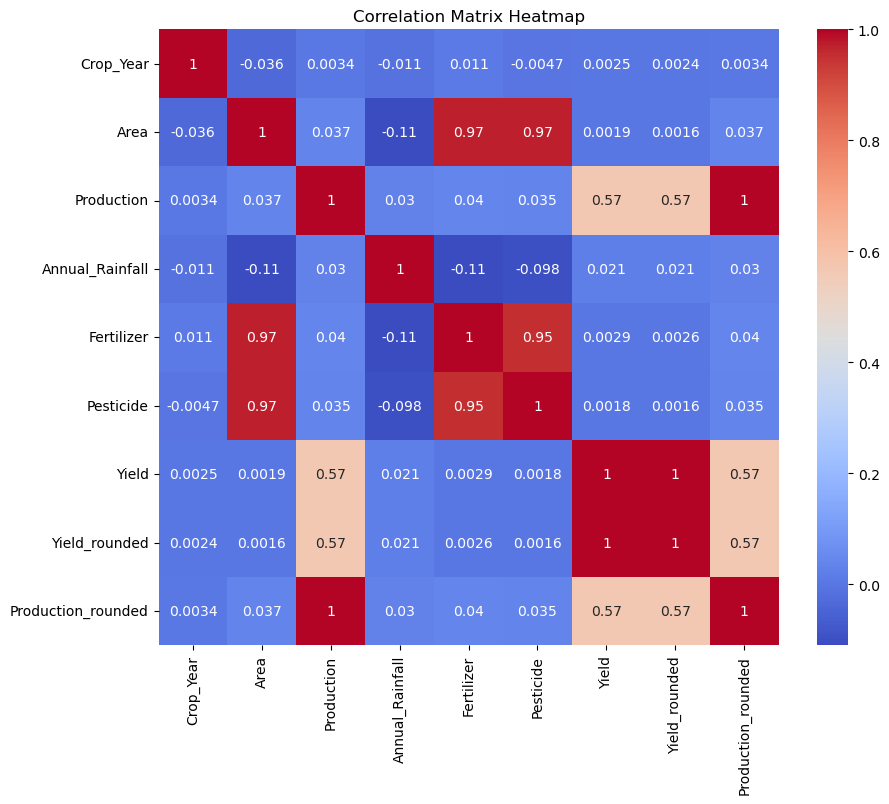

In [110]:
# display correlation matrix in heatmap
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()